In [3]:
import numpy as np
from sklearn.datasets import load_boston


In [4]:
boston =load_boston()

In [5]:
boston

{'DESCR': "Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  

In [9]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
data =boston.data
target=boston.target
data.shape

(506, 13)

In [13]:
num_features=len(boston.feature_names)
num_samples=data.shape[0]

In [15]:
import pandas as pd

In [16]:
boston_dataframe=pd.DataFrame(boston.data)

In [18]:
boston_dataframe.columns=boston.feature_names

In [19]:
boston_dataframe.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [22]:
boston_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [23]:
for i in range(num_features):
    feature_avg=np.mean(data[:,i])
    feature_max=np.amax(data[:,i])
    data[:,i]=(data[:,i]-feature_avg)/feature_max

In [24]:
weights_init=np.random.uniform(low=-1,high=1,size=num_features)
bias_init=0

In [25]:
weights_init


array([-0.26901979,  0.4934893 , -0.86051827,  0.25229964, -0.89970202,
        0.14136879,  0.46391241,  0.50238952,  0.00882399, -0.95938356,
       -0.92656095, -0.82208893,  0.11240683])

In [26]:
def hypothesis(weights,bias):
    return data.dot(weights)+np.repeat(bias,num_samples)

In [27]:
hypothesis(weights_init, bias_init)

array([ 0.49361112,  0.40600448,  0.32903186,  0.445945  ,  0.48957541,
        0.5044283 ,  0.3767479 ,  0.54936679,  0.61718427,  0.54088398,
        0.57340913,  0.47962322,  0.26244405, -0.02231656,  0.11604261,
       -0.05413   , -0.1674077 ,  0.09156838,  0.04824029, -0.0069375 ,
        0.18030056,  0.10112048,  0.11837633,  0.16554495,  0.14312916,
        0.28985453,  0.16738245,  0.3071996 ,  0.15880272,  0.13265903,
        0.22108447,  0.18855392,  0.43728243,  0.1968522 ,  0.44418145,
        0.17908627,  0.19186744,  0.07491913,  0.03169111,  0.65634265,
        0.62849066,  0.13600151,  0.15054392,  0.1325573 ,  0.30254028,
        0.22809107,  0.23905884,  0.53181026,  0.60145955,  0.41611586,
        0.55698826,  0.63122211,  0.42483343,  0.42730199,  0.44785898,
        1.01091748,  0.97190455,  1.19398522,  0.36031519,  0.39799374,
        0.51050035,  0.66247486,  0.50684411,  0.44075733,  0.82696396,
        0.70236564,  0.77243253,  0.16230257,  0.24228083,  0.21

In [29]:
def cost(weights, bias):
    return np.mean(np.square(hypothesis(weights,bias)-target))/2

In [30]:
cost(weights_init,bias_init)

293.74430864238479

In [38]:
def gradient(weights, bias):
    weights_gradient =[]
    for (weight_num,weight) in enumerate(weights):
        weights_gradient.append(np.mean((hypothesis(weights,bias)-target)*data[:,weight_num]))
    weights_gradient=np.array(weights_gradient)
    bias_gradient=np.mean(hypothesis(weights,bias)-target)
    return (weights_gradient,bias_gradient)

In [39]:
RATE=0.01
def gradient_descent(weights,bias,num_epochs):
    costs=[]
    
    for i in range(num_epochs):
        weights_gradient,bias_gradient=gradient(weights,bias)
        weights=weights-weights_gradient
        bias=bias-bias_gradient
        costs.append(cost(weights,bias))
    return costs, weights, bias

In [40]:
cost_final, weights_final, bias_final=gradient_descent(weights_init,bias_init, 1000)

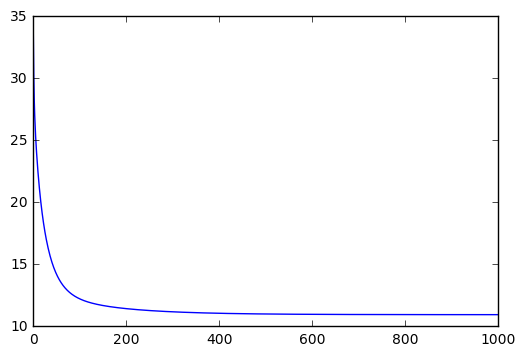

In [61]:
import matplotlib.pyplot as plt
plt.plot(cost_final)
plt.show()

In [45]:
from sklearn import linear_model
regr=linear_model.LinearRegression()

In [46]:
regr.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target,regr.predict(data)))

21.8977792177


In [49]:
cost_final[-1]

10.950557224796263

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(data,target,test_size=0.25,random_state=5)
print(X_train.shape)
print(X_test.shape)

ImportError: No module named 'sklearn.model_selection'

In [58]:
from sklearn.model_selection import train_test_split

ImportError: No module named 'sklearn.model_selection'

In [59]:
plt.scatter(target,hypothesis(weights_final,bias_final))

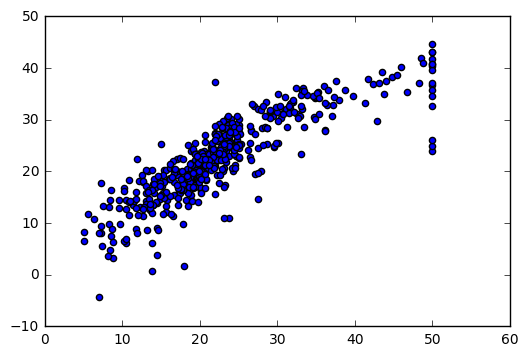

In [60]:
plt.show()